<h1><center>Laboratorio 7: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Sebastian Calderon Altamirano
- Nombre de alumno 2: Camila Vera Gallardo

### **Link de repositorio de GitHub:**
[Repo Sebastian Calderon](https://github.com/eldiddy/eldiddy.git)
[Repo Camila Vera](https://github.com/cxmilavg/cxmilavg.git)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.


### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [ ]:
import pandas as pd
import numpy as np

# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
from google.colab import drive
drive.mount("/content/drive")

# Cargar el dataset
path = '/content/drive/MyDrive/MDS7202/diabetes_data.csv'
df = pd.read_csv(path)

df.head(20)

Mounted at /content/drive


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
6,13.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

In [ ]:
!pip install xgboost

### Entrenamiento de modelo XGBoost

#### 1. EDA + Scalers

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [ ]:
# EDA: Valores unicos de cada columna
print("Valores únicos por columna:")
for col in df.columns:
    print(f"{col}: {df[col].unique()[:10]}")
    print(f"Cantidad de valores únicos: {df[col].nunique()}")
    print("-" * 50)

Valores únicos por columna:
Age: [ 4. 12. 13. 11.  8.  1.  6.  3.  7. 10.]
Cantidad de valores únicos: 13
--------------------------------------------------
Sex: [1. 0.]
Cantidad de valores únicos: 2
--------------------------------------------------
HighChol: [0. 1.]
Cantidad de valores únicos: 2
--------------------------------------------------
CholCheck: [1. 0.]
Cantidad de valores únicos: 2
--------------------------------------------------
BMI: [26. 28. 29. 18. 31. 32. 27. 24. 21. 58.]
Cantidad de valores únicos: 80
--------------------------------------------------
Smoker: [0. 1.]
Cantidad de valores únicos: 2
--------------------------------------------------
HeartDiseaseorAttack: [0. 1.]
Cantidad de valores únicos: 2
--------------------------------------------------
PhysActivity: [1. 0.]
Cantidad de valores únicos: 2
--------------------------------------------------
Fruits: [0. 1.]
Cantidad de valores únicos: 2
--------------------------------------------------
Veggies: [1. 

In [ ]:
## Scalers
# Variables numericas
minmax_cols = ['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth']

# Variables binarias
standard_cols = ['Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack',
                                'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
                                'DiffWalk', 'Stroke', 'HighBP']

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), minmax_cols),  # Normalizamos las variables numericas
        ('bin', 'passthrough', standard_cols),       # Las variables binarias no requieren transformacion
    ],
    verbose_feature_names_out=False  # Desactivar nombres verbose
).set_output(transform='pandas')          # Salida en formato pandas

#  Aplicamos el preprocesamiento
X = df.drop(columns=['Diabetes'])  # Eliminamos la columna objetivo
y = df['Diabetes']                                   # Variable objetivo

# Transformacion de los datos
X_scaled = preprocessor.fit_transform(X)
X_scaled

,Age,BMI,GenHlth,MentHlth,PhysHlth,Sex,HighChol,CholCheck,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,DiffWalk,Stroke,HighBP
0,0.250000,0.162791,0.50,0.166667,1.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.916667,0.162791,0.50,0.000000,0.000000,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,1.000000,0.162791,0.00,0.000000,0.333333,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.833333,0.186047,0.50,0.000000,0.100000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.583333,0.197674,0.25,0.000000,0.000000,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.416667,0.290698,0.75,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
70688,0.750000,0.197674,0.25,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
70689,1.000000,0.151163,1.00,0.500000,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
70690,0.833333,0.069767,0.75,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


#### 2. Separacion de Conjuntos de Entrenamiento y Prueba

In [ ]:
# Crear conjunto de entrenamiento y prueba (1/3 para prueba)
from sklearn.model_selection import train_test_split

# Separamos los datos en entrenamiento y prueba (1/3 para prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=1/3, random_state=7202, stratify=y
)

# Verificando el tamaño de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")

# Verificar la distribución de las clases en los conjuntos
print("\nDistribución de clases en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))
print("\nDistribución de clases en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))

Tamaño del conjunto de entrenamiento: 47128
Tamaño del conjunto de prueba: 23564

Distribución de clases en el conjunto de entrenamiento:
Diabetes
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

Distribución de clases en el conjunto de prueba:
Diabetes
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


#### 3. Pipeline

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Crear el pipeline con preprocesamiento y el modelo XGBoost
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocesamiento
    ('model', XGBClassifier(
        objective='binary:logistic',  # Add objective for probability output
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        random_state=7202,
        n_jobs=-1,
        eval_metric='logloss',
        tree_method='hist'
    ))
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Reportar el desempeño con classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

Classification Report:
              precision    recall  f1-score   support

         0.0      0.778     0.706     0.740     11782
         1.0      0.731     0.798     0.763     11782

    accuracy                          0.752     23564
   macro avg      0.754     0.752     0.752     23564
weighted avg      0.754     0.752     0.752     23564



### Comentarios y Respuestas

#### ¿Es acaso un buen predictor de diabetes?
El modelo tiene una accuracy del 75.2%, lo que indica que en general realiza predicciones correctas en la mayoría de los casos. Sin embargo, la precision y recall son diferentes entre las clases. Para la clase 0 (sin diabetes), el recall es de 0.706, lo que indica que no está identificando todos los pacientes que realmente no tienen diabetes. Para la clase 1 (diabetes), el recall es mejor, 0.798, lo que significa que el modelo es mejor para identificar a los pacientes con diabetes. Aunque no es perfecto, el modelo parece ser razonablemente bueno para predecir diabetes, con un buen balance entre las dos clases.

#### ¿Qué buscan explicar las métricas utilizadas?
Las métricas como precision, recal  y f1-score buscan explicar el desempeño del modelo en términos de cómo maneja las predicciones de ambas clases. La precision mide la exactitud de las predicciones positivas, el recall mide cuántos de los positivos reales fueron correctamente identificados, y el f1-score balancea ambas métricas, ofreciendo una medida combinada de precisión y recall. Además, el accuracy nos da una visión general de cuántas predicciones fueron correctas sin distinguir entre las clases.

#### ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?
Las métricas utilizadas en este caso no están directamente enfocadas en la selección de features Aunque ofrecen una buena evaluación del rendimiento global del modelo, no indican explícitamente qué features son las más importantes.

#### Comente las decisiones tomadas y los resultados obtenidos del modelo

Se decidió no aplicar ningún tipo de escalado a las variables binarias, como `Sex`, `HighChol`, `CholCheck`, etc., ya que estas no requieren transformación, dado que son variables categóricas que toman valores 0 o 1. Para las variables numéricas como `Age`, `BMI`, `GenHlth`, `MentHlth`, y `PhysHlth`, se utilizó MinMaxScaler, ya que estas variables se encuentran dentro de un rango y la normalización a un rango de 0 a 1 facilita el entrenamiento del modelo. El XGBoost no necesita escalado explícito, pero se aplicó el MinMaxScaler para estandarizar las variables numéricas, lo que podría ayudar a mejorar la eficiencia en el entrenamiento.

Los resultados obtenidos del modelo son razonablemente buenos, con un accuracy de 75.2% y un f1-score relativamente equilibrado entre las clases. Esto sugiere que las transformaciones aplicadas a las variables fueron adecuadas, especialmente al no aplicar escalado innecesario a las variables binarias. Sin embargo, el recall para la clase negativa es algo bajo, lo que indica que el modelo no está identificando de manera óptima a los pacientes que no tienen diabetes.


## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

### 1. Feature Importance

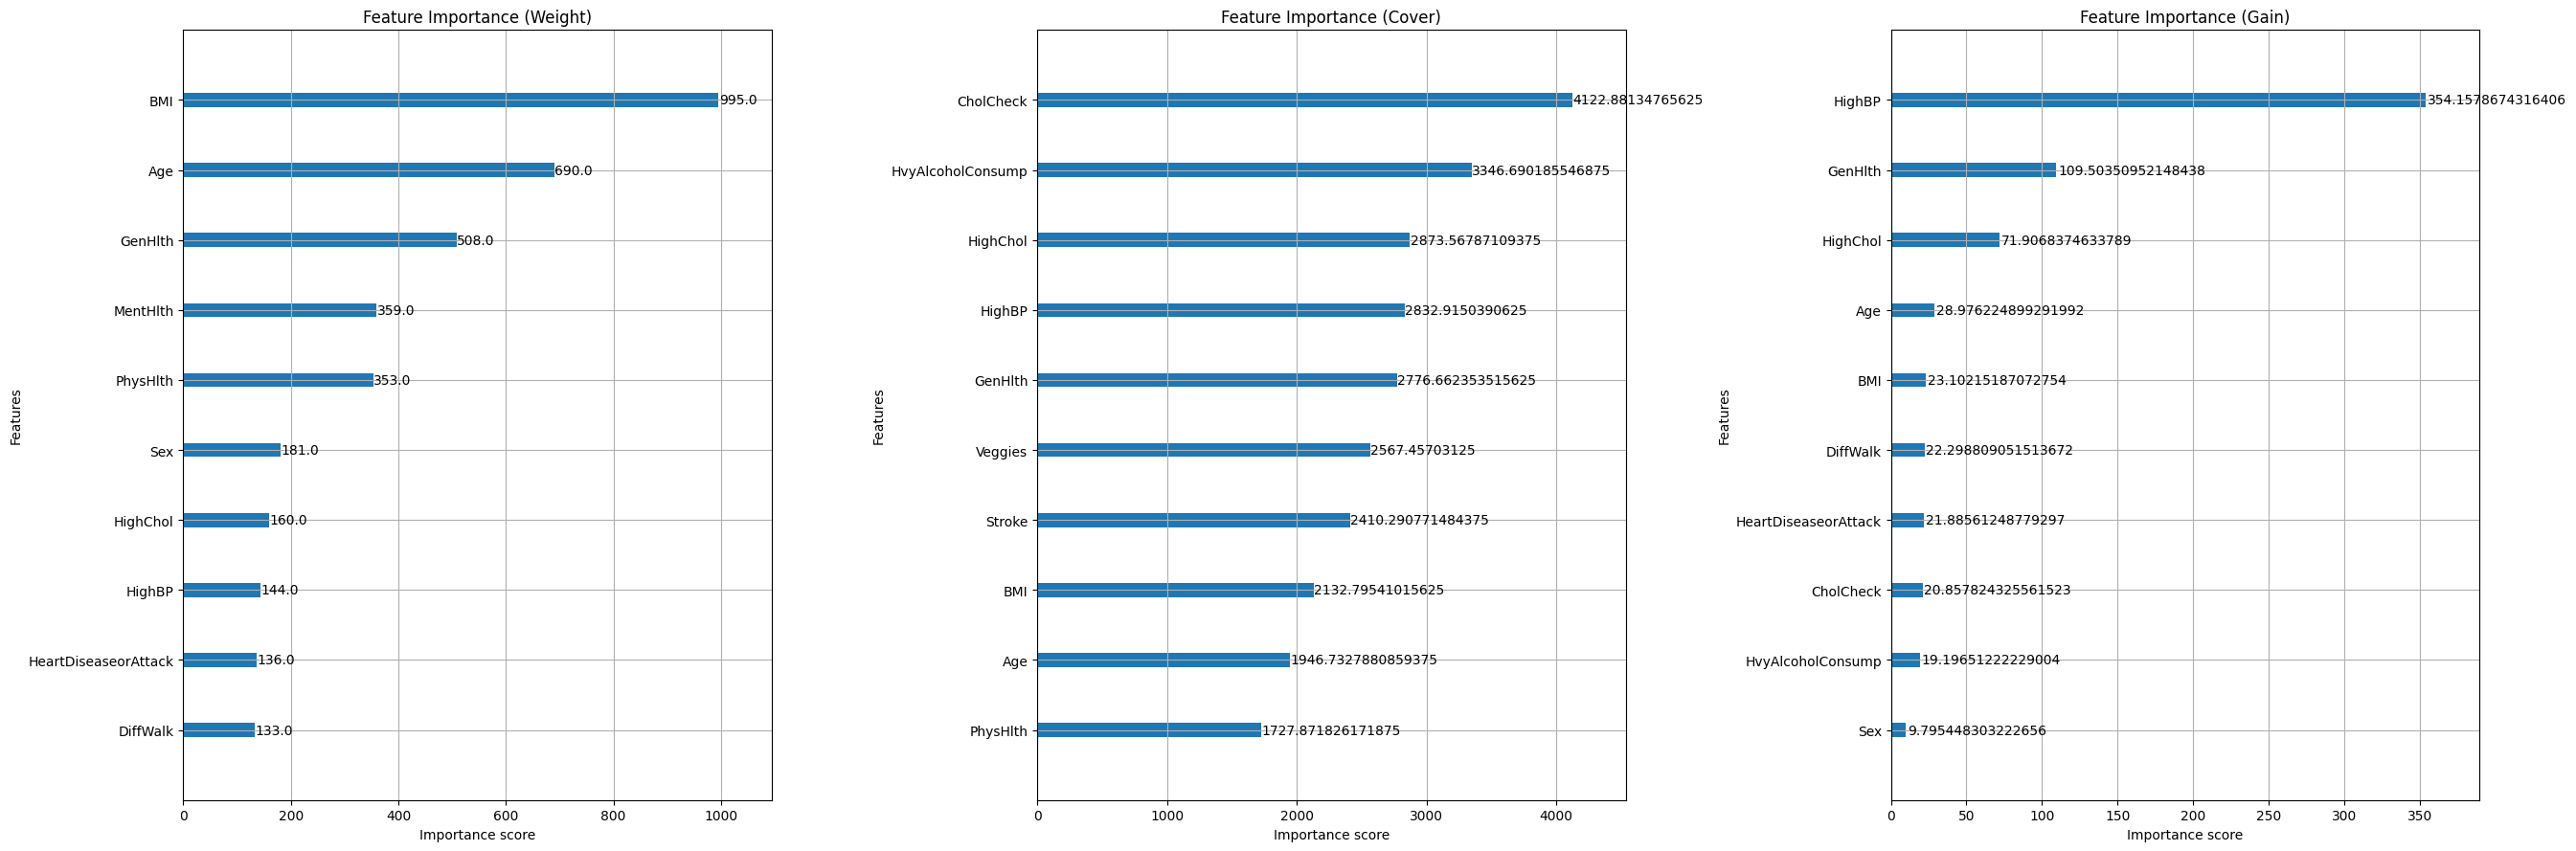

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

#Acceder al modelo entrenado dentro del pipeline
xgb_model = pipeline.named_steps['model']

# Calcular la importancia de las caracteristicas utilizando XGBoost
fig, ax = plt.subplots(1, 3, figsize=(27, 9))

# Importancia por 'weight'
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10, title='Feature Importance (Weight)', ax=ax[0])

# Importancia por 'cover'
xgb.plot_importance(xgb_model, importance_type='cover', max_num_features=10, title='Feature Importance (Cover)', ax=ax[1])

# Importancia por 'gain'
xgb.plot_importance(xgb_model, importance_type='gain', max_num_features=10, title='Feature Importance (Gain)', ax=ax[2])

plt.tight_layout()
plt.show()

### 2. ¿Los resultados obtenidos con los diferentes métodos son compatibles? Comente sus resultados y a qué se debe la igualdad o desigualdad que ve en los resultados.

Los resultados obtenidos con los diferentes métodos de importancia de características (**Weight**, **Cover** y **Gain**) muestran tanto similitudes como diferencias notables en los puntajes de importancia de las características.

1. **Similitudes**:
   - GenHlth aparece de manera consistente entre las características más importantes en los tres métodos, lo que indica que esta variable es fundamental para el modelo en general.
   - BMI también aparece en todos los métodos, aunque en diferentes posiciones, lo que sugiere que esta variable tiene un impacto significativo en la predicción del modelo en términos de frecuencia de uso y ganancia.

2. **Diferencias**:
   - Weight coloca a BMI como la característica más importante, con un puntaje de 995 seguido de Age (690) y GenHlth (508) Estas características están altamente relacionadas con la salud general de un individuo y son frecuentemente utilizadas para segmentar a los pacientes en el modelo. La alta frecuencia de uso de estas características en las divisiones de los árboles podría reflejar que son esenciales para el modelo.
   - Cover coloca a CholCheck (4122) y HvyAlcoholConsump (3346) entre las características más importantes, lo que indica que estas variables tienen una alta cobertura en el modelo. CholCheck podría tener un alto puntaje porque tener un chequeo de colesterol es un factor crítico para predecir la diabetes, ya que las personas con alto colesterol tienen un mayor riesgo de desarrollar enfermedades relacionadas con la diabetes. HvyAlcoholConsump, por otro lado, refleja un comportamiento de alto riesgo, lo que podría ser un indicio claro de que las personas con alto consumo de alcohol podrían estar más predispuestas a enfermedades crónicas, incluyendo la diabetes.
   - Gain coloca a HighBP (354) como la característica más importante, seguida de GenHlth (109) y HighCol (71). La presión alta (HighBP) es una condición asociada estrechamente con la diabetes, ya que es un factor de riesgo importante para desarrollar esta enfermedad. Además, HighCol (colesterol alto) tiene un puntaje de 71, lo que refleja su importancia en la predicción de diabetes, ya que el colesterol alto está estrechamente relacionado con enfermedades cardiovasculares y metabólicas, que a menudo coexisten con la diabetes.

### Razón de la desigualdad:
La diferencia en los resultados entre los métodos se debe a la naturaleza de lo que cada métrica evalúa y cómo se calcula la "importancia" de las características:

- Weight: Este método mide cuántas veces una característica se usa en las divisiones del árbol. Características como BMI y Age tienen una alta frecuencia de uso en las divisiones porque son representativas de la salud general de un paciente y están muy relacionadas con la probabilidad de que un paciente tenga diabetes. GenHlth y PhysHlth también están en el top, ya que reflejan aspectos generales de la salud que son indicativos del riesgo de desarrollar enfermedades crónicas.
  
- Cover: En este caso, se mide la cobertura de cada característica, es decir, cuántas observaciones se dividen utilizando esa característica. CholCheck y HvyAlcoholConsump tienen una alta cobertura porque son características cruciales para identificar riesgos de enfermedades. Las personas con chequeos regulares de colesterol y aquellos con un consumo excesivo de alcohol están en el radar del modelo, por lo que estas características tienen una


### 3. ¿Las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

Las importancias de características obtenidas a partir de los métodos Weight, Cover, y Gain nos proporcionan una visión inicial de cómo las diferentes variables contribuyen al modelo. Sin embargo, estas métricas, aunque útiles, no son completamente suficientes para garantizar la interpretabilidad total de un modelo basado en árboles, como el XGBoost.

### Suficiencia de las importancias para la interpretabilidad:
Los métodos de importancia nos indican cuáles características son las más influyentes en el modelo, pero no nos dicen cómo o por qué esas características afectan las predicciones en un nivel más detallado. Por ejemplo, aunque sabemos que BMI y GenHlth son importantes según la frecuencia de uso (Weight) o cobertura (Cover), no entendemos la relación exacta entre esas variables y las predicciones. Los métodos de importancia nos dan una idea general de qué características son relevantes, pero no explican el comportamiento o decisiones locales del modelo.

### Debilidad del método:
Una de las principales debilidades de este enfoque es que las métricas de importancia no nos permiten entender completamente las interacciones entre características o cómo estas influyen en una predicción particular. Los modelos de árboles de decisión, como XGBoost, son muy complejos, y aunque nos dicen qué características son más relevantes, no pueden explicarnos por qué esas características influyen de la manera en que lo hacen.

En resumen, aunque las importancias nos proporcionan una primera aproximación, se requieren otras técnicas de interpretabilidad local, como SHAP o PDP, para obtener una visión más clara y comprensible de las decisiones del modelo a nivel de instancia. Estos métodos complementan las métricas de importancia al proporcionar explicaciones más profundas sobre el impacto de cada característica en las predicciones individuales.


## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

### 1. Metodo de Permutacion

                 Feature  Importance   Std Dev
2                GenHlth    0.055292  0.001811
1                    BMI    0.029728  0.001667
0                    Age    0.025369  0.001657
16                HighBP    0.014102  0.000839
6               HighChol    0.010257  0.000948
7              CholCheck    0.003968  0.000671
13     HvyAlcoholConsump    0.003862  0.000590
5                    Sex    0.002334  0.000569
9   HeartDiseaseorAttack    0.002317  0.000702
3               MentHlth    0.001549  0.000447
14              DiffWalk    0.001388  0.000407
15                Stroke    0.000654  0.000430
12               Veggies    0.000501  0.000581
8                 Smoker    0.000361  0.000311
4               PhysHlth    0.000310  0.000652
10          PhysActivity   -0.000055  0.000320
11                Fruits   -0.000119  0.000380


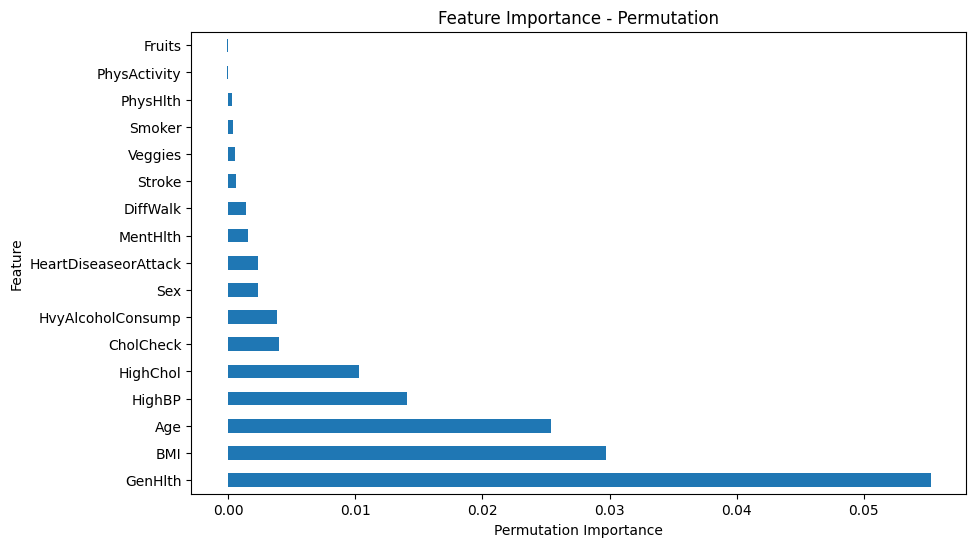

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Obtener los nombres de las caracteristicas del modelo XGBoost
feature_names = pipeline.named_steps['model'].get_booster().feature_names

# Evaluar el modelo en el conjunto de test antes de la permutacion
baseline_score = pipeline.score(X_test, y_test)

# Permutacion de caracteristicas
result = permutation_importance(pipeline, X_test, y_test,
                                n_repeats=10,  # N° de permutaciones
                                random_state=7202,
                                n_jobs=1, # Changed n_jobs to 1 to avoid multiprocessing issues
                                scoring='accuracy')

# Crear un DataFrame para almacenar los resultados
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': result.importances_mean,
    'Std Dev': result.importances_std
})

# Ordenar las caracteristicas por la importancia media
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar los resultados
print(importance_df)

# Graficar la importancia de las características
importance_df.plot(kind='barh', x='Feature', y='Importance', legend=False, figsize=(10, 6))
plt.xlabel('Permutation Importance')
plt.title('Feature Importance - Permutation')
plt.show()

### 2. Repetir permutacion 30 veces

Desviación estándar de la importancia de las características:
                 Feature  Importance Std Dev
2                GenHlth            0.000535
1                    BMI            0.000478
0                    Age            0.000473
16                HighBP            0.000406
6               HighChol            0.000398
3               MentHlth            0.000210
5                    Sex            0.000207
13     HvyAlcoholConsump            0.000206
9   HeartDiseaseorAttack            0.000180
4               PhysHlth            0.000175
14              DiffWalk            0.000173
7              CholCheck            0.000157
12               Veggies            0.000141
15                Stroke            0.000123
11                Fruits            0.000119
8                 Smoker            0.000073
10          PhysActivity            0.000061


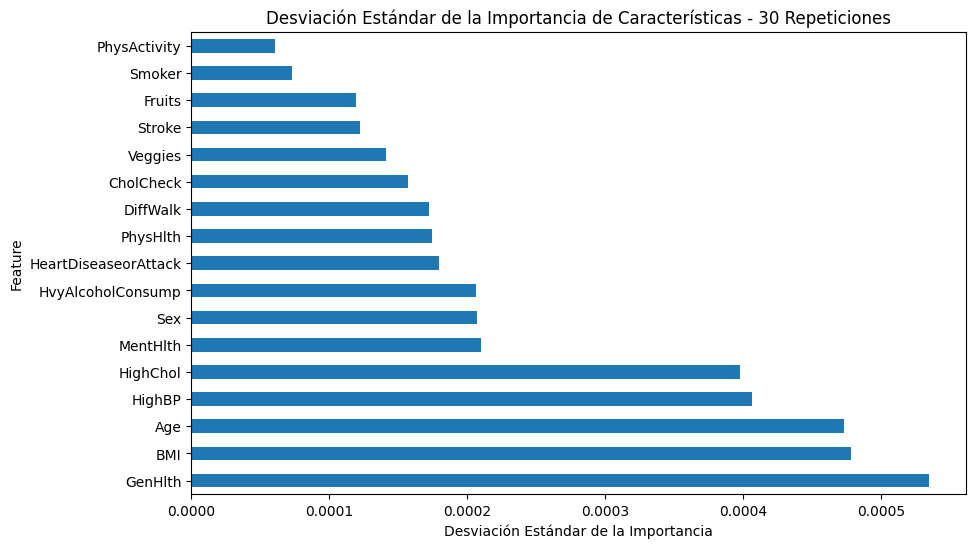

In [ ]:
# N° de repeticiones
n_repeats = 30

# Almacenar la importancia para cada repeticion
all_importances = np.zeros((n_repeats, len(feature_names)))

# Repetir el proceso 30 veces
for i in range(n_repeats):
    result = permutation_importance(pipeline, X_test, y_test,
                                    n_repeats=10,
                                    random_state=7202 + i,
                                    n_jobs=1,
                                    scoring='accuracy')

    # Guardar las importancias de esta repeticion
    all_importances[i, :] = result.importances_mean

# Calcular la desviacion estandar de la importancia de cada caracteristica
importances_std = np.std(all_importances, axis=0)

# Crear un DataFrame para mostrar las importancias y dev_std
importance_std_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance Std Dev': importances_std
})

# Ordenar por desviacion estándar
importance_std_df = importance_std_df.sort_values(by='Importance Std Dev', ascending=False)

# Mostrar los resultados
print("Desviación estándar de la importancia de las características:")
print(importance_std_df)

# Graficar  desviacion estándar
importance_std_df.plot(kind='barh', x='Feature', y='Importance Std Dev', legend=False, figsize=(10, 6))
plt.xlabel('Desviación Estándar de la Importancia')
plt.title('Desviación Estándar de la Importancia de Características - 30 Repeticiones')
plt.show()

### 4. Responder a las preguntas

#### ¿Cómo mide la importancia de las *features* su propuesta?
Usamos Permutation Importance: para cada feature se permuta (baraja) su columna en `X_test`, se vuelve a evaluar el modelo y se mide la pérdida de desempeño (con el accuracy). Si la permutación de una variable provoca una caída mayor que la de otras, concluimos que esa variable es más relevante para la predicción. Repetimos el proceso múltiples veces y resumimos con la media  y la desviación estándar de esa caída.


#### ¿Qué *features* tienen un mayor impacto en la salida del modelo? Comente las 5 primeras, ¿tienen sentido?
Considerando los resultados tras 30 repeticiones, las variables que emergen como más influyentes (y además con mayor estabilidad relativa) son GenHlth, BMI,  Age, HighBP y HighChol. Esto tiene sentido clínico:
- **GenHlth** (salud general): resume carga de enfermedad y bienestar; suele correlacionar con condiciones crónicas como la diabetes.
- **BMI** (índice de masa corporal): exceso de peso es un factor de riesgo directo para resistencia a la insulina y diabetes.
- **Age** (edad): la probabilidad de diabetes aumenta con la edad por cambios metabólicos acumulados.
- **HighBP** (hipertensión): frecuente comorbilidad metabólica; comparte vías de riesgo con diabetes.
- **HighChol** (colesterol alto): dislipidemias se asocian a síndrome metabólico y resistencia a la insulina.



#### ¿Cómo cambian sus conclusiones con respecto a las *feature importances* del punto anterior?
Las importancias internas de XGBoost (*weight/cover/gain*) ofrecían perspectivas de analisis complementarias: *weight* favorecía el uso frecuente (BMI, Age), *cover* resaltaba variables que dividían muchos casos (CholCheck, HvyAlcoholConsump), y *gain* priorizaba la mejora por división (HighBP, GenHlth).  
La permutación, en cambio, evalúa el efecto causal en el desempeño del modelo final sobre datos de test. Esto armoniza las discrepancias: ahora se evidencia un núcleo clínico estable (GenHlth, BMI, Age, HighBP, HighChol) como variables que, cuando se destruye su información, más perjudican la capacidad predictiva. En síntesis, pasamos de señales “de entrenamiento” a una medida agnóstica y post-hoc sobre el rendimiento, que confirma y prioriza mejor las *features* con sentido clínico.


#### Nombre y explique 3 ventajas y 3 desventajas del método implementado.
**Ventajas**
1. **Agnóstico al modelo**: no depende de la estructura interna (funciona con cualquier *pipeline*); mide el impacto **real** en la métrica de evaluación.
2. **Interpretación directa**: la importancia es “cuánto cae el desempeño si rompo esta *feature*”; fácil de explicar a perfiles clínicos.
3. **Estabilidad cuantificada**: repetir 30 veces nos da desviación estándar, útil para juzgar robustez  de la importancia.

**Desventajas**
1. **Costo computacional**: requiere reevaluar el modelo muchas veces (por *feature* × repeticiones).
2. **Sensibilidad a correlaciones**: si dos *features* están muy correlacionadas, permutar una puede no bajar mucho el desempeño, subestimando su importancia.
3. **Dependencia de la métrica y del *split***: los resultados cambian con la métrica elegida (accuracy vs F1/PR-AUC) y con el conjunto de test, pudiendo requerir validaciones adicionales para concluir con confianza.


## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [ ]:
!pip install shap

In [ ]:
import shap

# 1. Calcular los SHAP values del modelo
print("Calculando SHAP values...")

# Obtener el modelo entrenado del pipeline
xgb_model = pipeline.named_steps['model']

# Obtener los datos preprocesados
X_test_preprocessed = pipeline.named_steps['preprocessor'].transform(X_test)

# Crear el explainer de SHAP y calcular valores
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_preprocessed)

# Mostrar información básica
print(f"Forma de los SHAP values: {shap_values.shape}")
print(f"Valor base (expected_value): {explainer.expected_value:.4f}")

# Mostrar los SHAP values obtenidos
print("\nMuestra de SHAP values calculados (primeras 5 instancias):")
shap_df = pd.DataFrame(shap_values, columns=X_test_preprocessed.columns)
print(shap_df.head())

# Mostrar estadísticas de los SHAP values
print("\nEstadísticas de los SHAP values por feature:")
shap_stats = pd.DataFrame({
    'Media': shap_df.mean(),
    'Desviación Estándar': shap_df.std(),
    'Mínimo': shap_df.min(),
    'Máximo': shap_df.max()
})
print(shap_stats)

# Verificación: mostrar que la suma de SHAP + valor base = predicción
print(f"\nVerificación para primera instancia:")
print(f"Valor base: {explainer.expected_value:.4f}")
print(f"Suma SHAP values instancia 0: {shap_values[0].sum():.4f}")
print(f"Total: {explainer.expected_value + shap_values[0].sum():.4f}")
print(f"Predicción real modelo: {xgb_model.predict_proba(X_test_preprocessed[0:1])[0][1]:.4f}")

Calculando SHAP values...
Forma de los SHAP values: (23564, 17)
Valor base (expected_value): -0.0029

Muestra de SHAP values calculados (primeras 5 instancias):
        Age       BMI   GenHlth  MentHlth  PhysHlth       Sex  HighChol  \
0 -0.478077 -0.224906 -0.723432 -0.178718 -0.007395 -0.068684 -0.374839   
1  0.083237 -0.191835  0.844586  0.059655 -0.046756 -0.034280  0.278930   
2  0.104850  0.019126 -0.669798  0.038896  0.022542 -0.058310  0.255873   
3  0.504250  0.036486 -0.549381  0.023005  0.013634  0.089820  0.150702   
4  0.096599  0.440591  0.133886 -0.033822  0.045096 -0.036695  0.266401   

   CholCheck    Smoker  HeartDiseaseorAttack  PhysActivity    Fruits  \
0   0.019692 -0.006535             -0.054991     -0.000155  0.000665   
1   0.023026 -0.014934             -0.056113     -0.000965  0.011535   
2   0.021147 -0.009203             -0.038307     -0.001376  0.011384   
3   0.014051 -0.006579              0.322625     -0.014102 -0.034690   
4   0.025626  0.000204      

2. ¿Qué representa cada número en su resultado? Cada número en el resultado de los SHAP values representa la contribución de una característica (o variable) específica al valor de la predicción del modelo para una instancia particular. Por ejemplo, el valor -0.478077 para la característica "Age" en la primera instancia indica que la edad de esa persona contribuye negativamente a la predicción del modelo.

- El valor base (-0.0029) corresponde al valor de la predicción promedio del modelo, antes de que se considere cualquier característica.

- La suma de los SHAP values en la instancia 0 (-1.7184) representa la contribución total de las características de esta instancia al cambio del valor base. En este caso, la predicción se desplaza hacia abajo por esta cantidad.

- La predicción real del modelo es el valor final de la predicción que el modelo hace para esa instancia después de ajustar el valor base con las contribuciones de las características, es decir, la probabilidad predicha de que el evento ocurra

3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? Si, el obtener un resultado positivo o negativo tiene una implicancia importante, ya que indica el impacto que tiene cada caracterísica en la predicción.

- Los valores positivos indican que esa característica contribuye aumentando la predicción del modelo, es decir está empujando la posibilidad hacia el valor más alto de la predicción (en clasificación binaria sería 1).

- Los valores negativos indican que esa característica contribuye disminuyendo la predicción del modelo. Por ejemplo la variable 'Age' en la primera instancia (-0.478077) indica que la edad de esa persona reduce la probabilidad de que ocurra el evento.

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

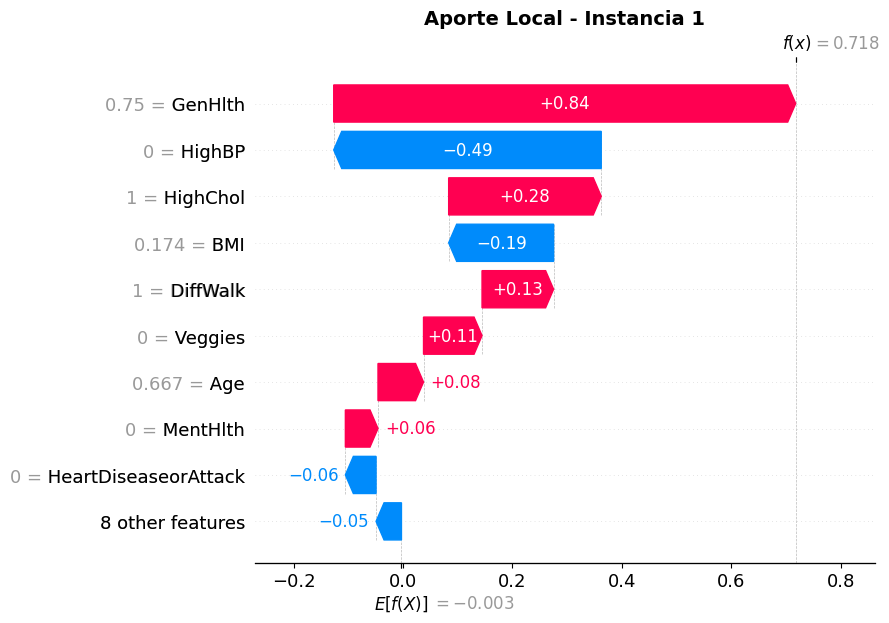

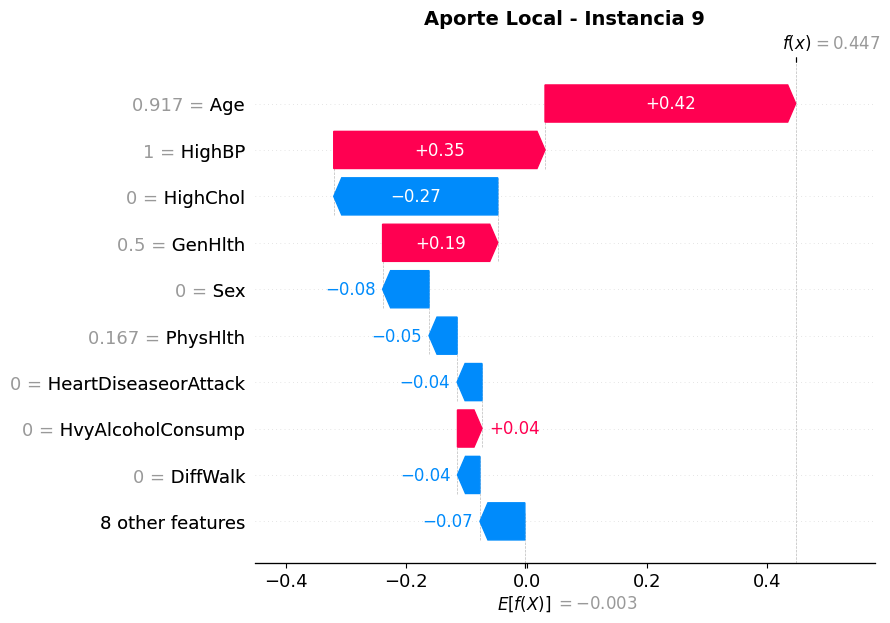

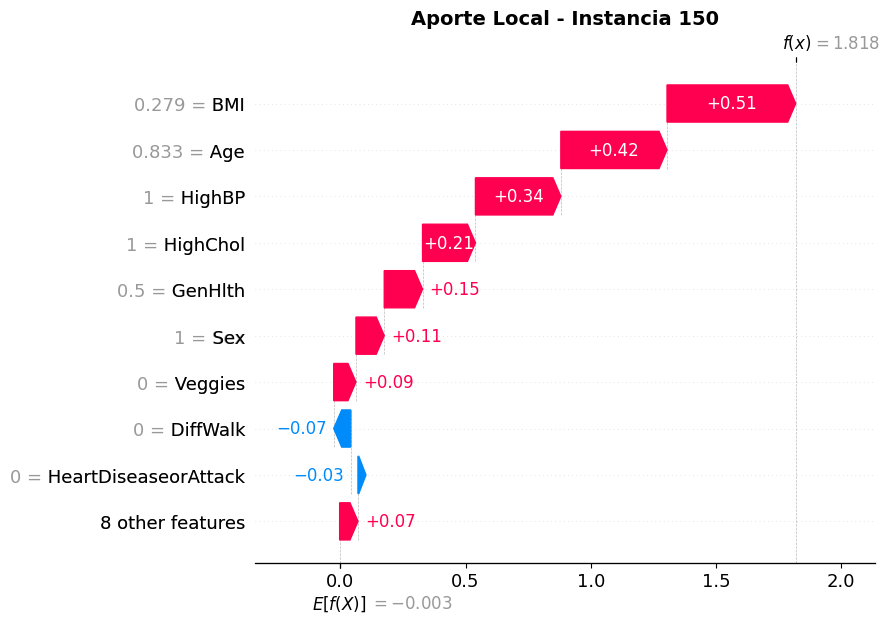

In [ ]:
import matplotlib.pyplot as plt

# Gráficos de aporte local para instancias 1, 9 y 150

# Instancia 1
plt.figure(figsize=(10, 6))
shap.waterfall_plot(shap.Explanation(values=shap_values[1],
                                    base_values=explainer.expected_value,
                                    data=X_test_preprocessed.iloc[1],
                                    feature_names=X_test_preprocessed.columns.tolist()),
                   show=False, max_display=10)
plt.title('Aporte Local - Instancia 1', fontsize=14, fontweight='bold')
plt.show()

# Instancia 9
plt.figure(figsize=(10, 6))
shap.waterfall_plot(shap.Explanation(values=shap_values[9],
                                    base_values=explainer.expected_value,
                                    data=X_test_preprocessed.iloc[9],
                                    feature_names=X_test_preprocessed.columns.tolist()),
                   show=False, max_display=10)
plt.title('Aporte Local - Instancia 9', fontsize=14, fontweight='bold')
plt.show()

# Instancia 150
plt.figure(figsize=(10, 6))
shap.waterfall_plot(shap.Explanation(values=shap_values[150],
                                    base_values=explainer.expected_value,
                                    data=X_test_preprocessed.iloc[150],
                                    feature_names=X_test_preprocessed.columns.tolist()),
                   show=False, max_display=10)
plt.title('Aporte Local - Instancia 150', fontsize=14, fontweight='bold')
plt.show()


1. ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?
- Variables que afectan de manera positiva: GenHlth en todas las instancias tiene un impacto positivo, especialmente en la primera; Age tiene un resultado positivo alto, lo cual tiene sentido ya que la probabilidad de contraer diabetes aumenta con la edad; HighBP aumenta la probabilidad de diabetes en la instancia 9 y 150, lo cual tiene sentido porque la hipertensión es un factor de riesgo importante asociado con enfermedades como la diabetes; HighChol se observa un impacto positivo en la instancia 1 y 150, resultado esperado porque al igual que con la hipertensión, el colesterol alto se relaciona con la diabetes; BMI tiene un impacto positivo en la instancia 150.

- Variables que afectan de manera negativa: DiffWalk presenta un resultado negativo en la instancia 9 y 150; HeartDiseaseorAttack se presenta con un resultado negativo en las 3 instancias.


2. ¿Existe algún patrón común entre las instancias analizadas?
Sí, existen patrones comunes: Age y GenHlth aparecen consistentemente como features importantes. La dirección del impacto es generalmente consistente (Age siempre positivo, HeartDiseaseorAttack siempre negativo). Sin embargo, la magnitud varía significativamente entre pacientes, reflejando diferencias individuales en el perfil de riesgo.



3. ¿Es posible generalizar estas conclusiones a todo el dataset?
No es posible generalizar estas conclusiones a todo el dataset basándose solo en estas tres instancias. Los resultados presentados son válidos localmente para las instancias específicas que se analizaron, pero para generalizar es necesario evaluar el comportamiento del modelo en todo el dataset.

### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

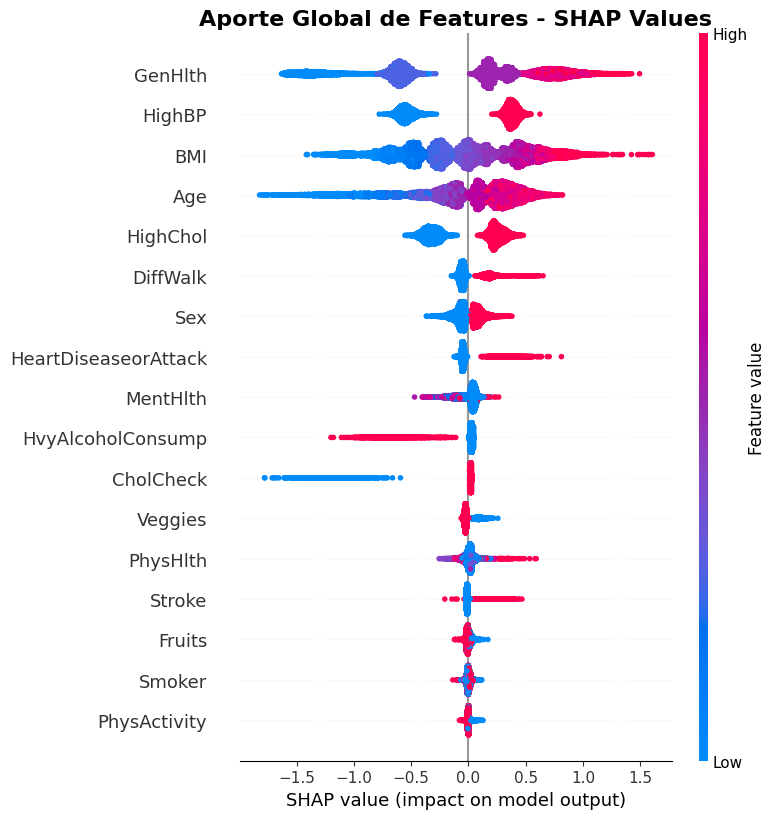

In [ ]:
# Visualización del aporte global de cada feature
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_preprocessed, show=False)
plt.title("Aporte Global de Features - SHAP Values", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

##### Interpretación del impacto global:

- 'GenHlth': En el gráfico de impacto global, GenHlth muestra un fuerte impacto positivo en el modelo, con una tendencia clara de aumentar la probabilidad de diabetes a medida que mejora la salud general. Esto es consistente con el impacto observado en las instancias.

- 'HighBP': También tiene un impacto significativo en la probabilidad de diabetes. A nivel global, es claro que las personas con hipertensión tienden a tener una mayor probabilidad de desarrollar diabetes. Esta tendencia también se refleja en las instancias específicas.

- 'BMI': Muestra un comportamiento no lineal, similar al patrón observado en las instancias, esto indica que los valores intermedios son más influyentes que los valores extremos, lo que tiene sentido a nivel global y en las instancias.

- 'Age': La edad tiene un impacto creciente en la probabilidad de diabetes a nivel global, algo que también es evidente en las instancias específicas.

- 'HighChol': Al igual que en los gráficos de instancias, el colesterol alto tiene una relación directa y lineal con la probabilidad de diabetes a nivel global.


##### Diferencias con las conclusiones a nivel instancia:

- Los patrones observados a nivel global se mantienen coherentes con los encontrados a nivel de instancia. Sin embargo, a nivel de instancia, podemos observar variaciones menores que podrían depender de la interacción entre características. Por ejemplo, en algunas instancias como la 9, 'BMI' muestra un impacto menos significativo, mientras que en otras como la 150, su impacto es mayor.

- Algunas variables, como 'PhysHlth', 'MentHlth', o 'Smoker', pueden no mostrar un impacto significativo a nivel global, pero en las instancias individuales, algunas pueden tener un mayor impacto en el modelo en ciertas circunstancias.

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

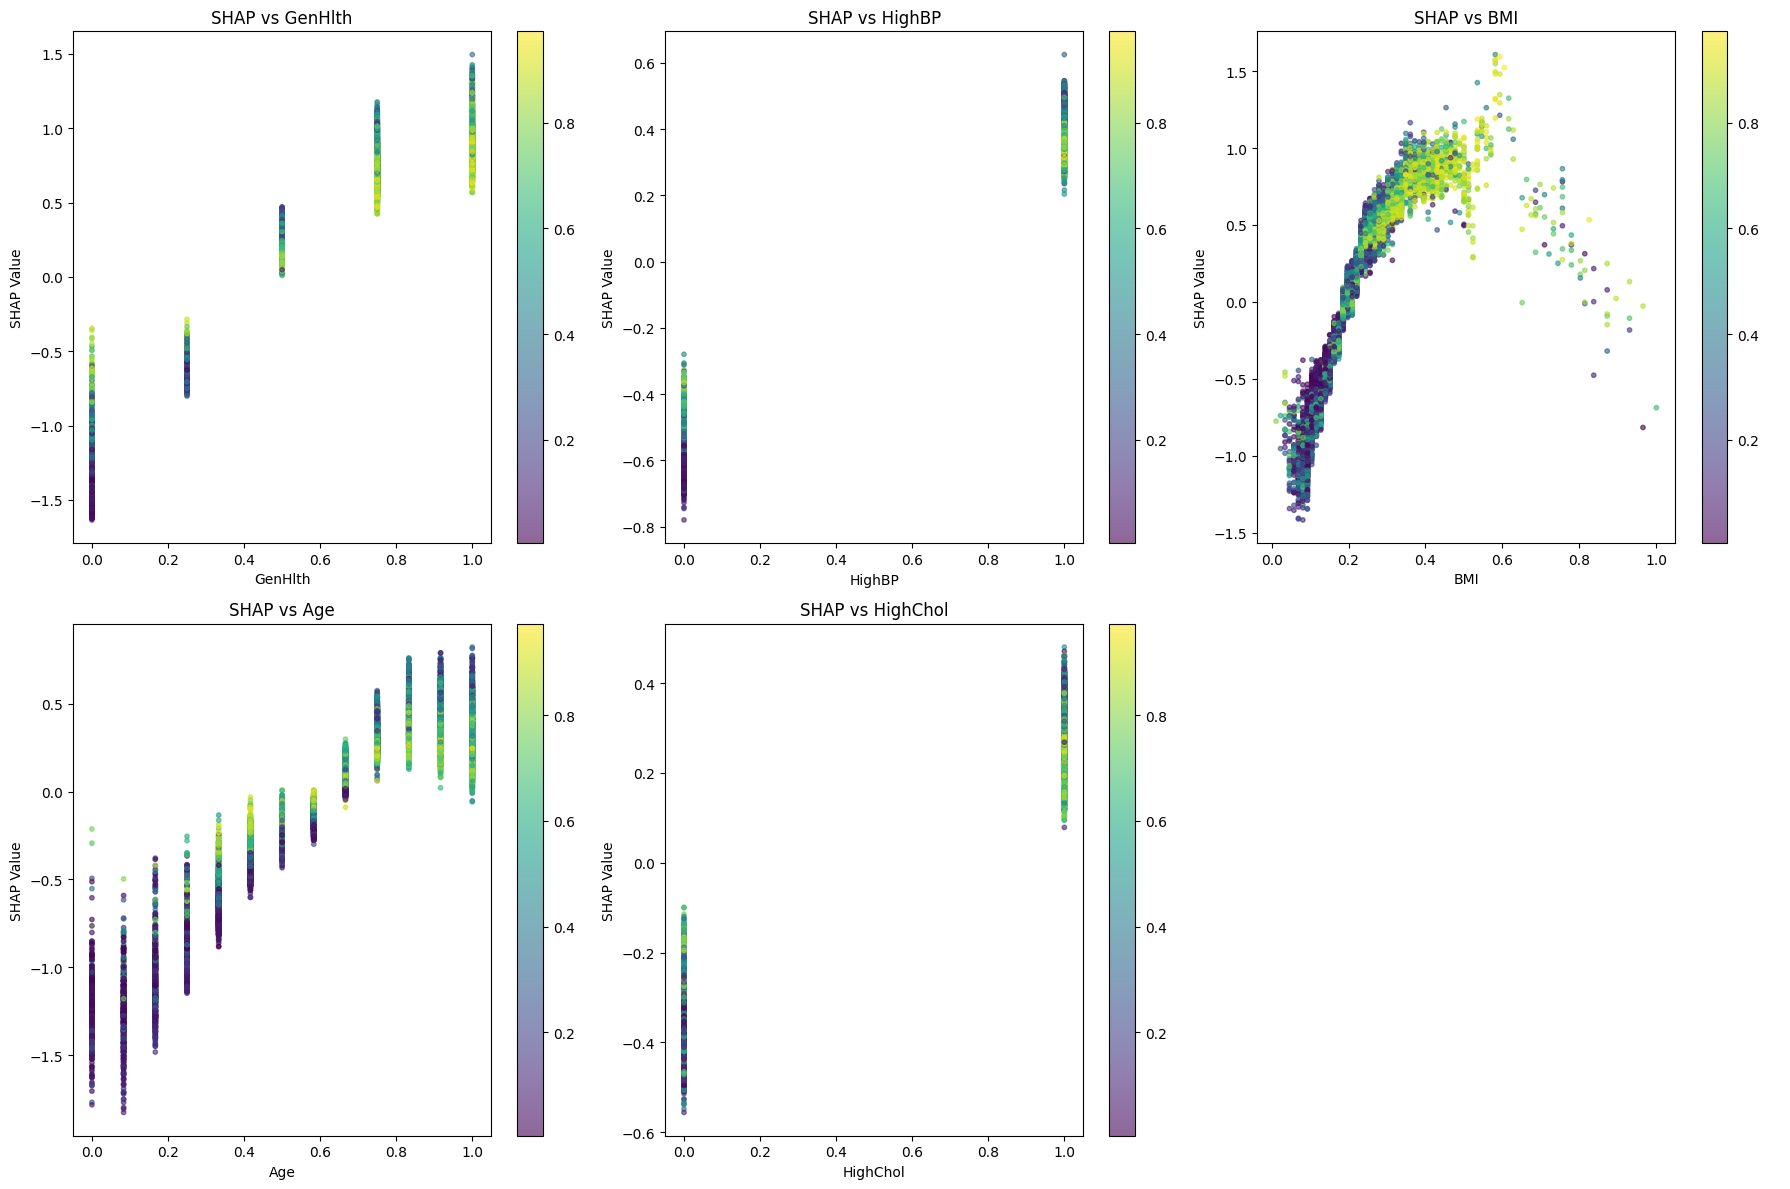

In [ ]:
import matplotlib.pyplot as plt

# Obtener las probabilidades de diabetes
probabilities = pipeline.predict_proba(X_test_preprocessed)[:, 1]

# Top 5 features con mayor impacto global
top_5_features = ['GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol']

# Crear figura con subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Generar un scatterplot para cada feature
for i, feature in enumerate(top_5_features):
    row = i // 3
    col = i % 3
    feature_idx = list(X_test_preprocessed.columns).index(feature)

    scatter = axes[row, col].scatter(
        X_test_preprocessed[feature],
        shap_values[:, feature_idx],
        c=probabilities,
        cmap='viridis',
        alpha=0.6,
        s=10
    )

    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel(f'SHAP Value')
    axes[row, col].set_title(f'SHAP vs {feature}')

    # Añadir colorbar a cada subplot
    plt.colorbar(scatter, ax=axes[row, col])

# Ocultar el subplot vacío si existe
if len(top_5_features) < 6:
    axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

El gráfico mostrado en la imagen anterior sugiere una relación interesante entre los SHAP values y las características con mayor impacto global en la predicción de la probabilidad de tener diabetes.

- 'GenHlth': La relación muestra una fuerte polarización en los valores de SHAP, con valores positivos predominando en los casos con mejor salud general (cerca de 1), lo que indica una mayor probabilidad de que las personas con buena salud general tengan diabetes, según el modelo.

- 'HighBP': Similar a la variable anterior, los valores de SHAP reflejan una mayor probabilidad de diabetes en las personas con presión alta (cerca de 1), mostrando una relación bastante clara entre los valores de SHAP y la presencia de hipertensión.

- 'BMI': El gráfico muestra una relación no lineal, con un peak significativo que indica que los valores intermedios de BMI están fuertemente asociados con un mayor valor de SHAP, lo que puede reflejar un aumento en la probabilidad de diabetes.

- 'Age': Los valores de SHAP en este caso se agrupan a lo largo de la variable 'Age', con un aumento progresivo en los valores de SHAP conforme se incrementa la edad. Esto sugiere que el modelo predice con más certeza que las personas mayores tienen una mayor probabilidad de tener diabetes.

- 'HighChol': Similar a 'HighBP', la relación es más directa y lineal, donde los valores de SHAP se asocian con los niveles de colesterol alto, mostrando una clara indicación de que las personas con colesterol alto tienen una mayor probabilidad de tener diabetes.



##### Conclusiones:
- En la mayoría de las características, un valor alto de la característica está relacionado con un valor positivo de SHAP, lo que sugiere que el modelo tiende a predecir una mayor probabilidad de diabetes cuando las características clave como 'GenHlth', 'HighBP', 'BMI', 'Age', y 'HighChol' toman valores más extremos.

- Algunas características, como el 'BMI', muestran una relación no lineal con los SHAP values, indicando que el impacto de la característica en la probabilidad de diabetes no es constante a lo largo de todos los valores.



### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

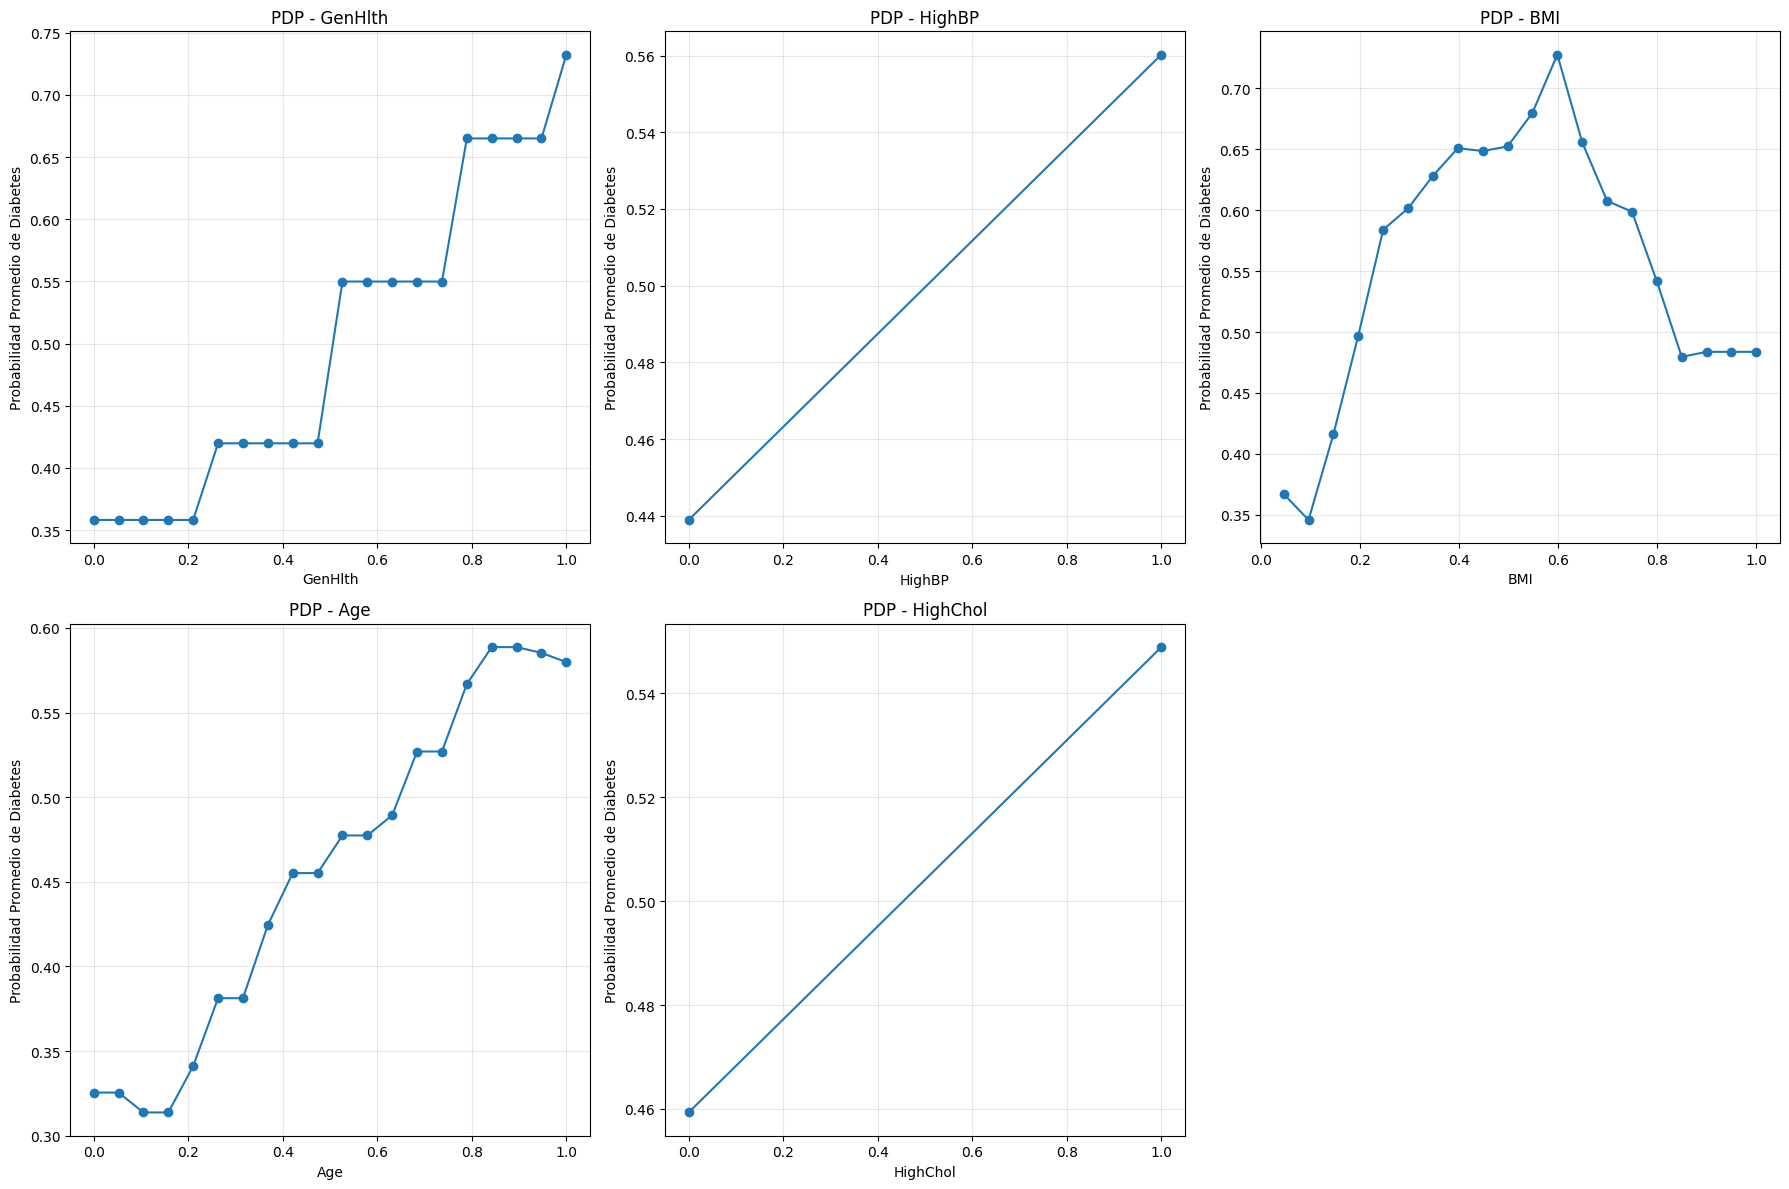

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Tomar submuestra de 1000 observaciones
sample_indices = np.random.choice(len(X_test_preprocessed), size=1000, replace=False)
X_sample = X_test_preprocessed.iloc[sample_indices]

# Top 5 features con mayor impacto global
top_5_features = ['GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol']

# Crear figura
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Función mejorada para calcular PDP manualmente
def manual_partial_dependence(model, X, feature, grid_resolution=20):
    # Verificar si la feature es binaria o continua
    unique_vals = X[feature].unique()

    if len(unique_vals) <= 2:  # Feature binaria
        grid = sorted(unique_vals)
    else:  # Feature continua
        feature_min = X[feature].min()
        feature_max = X[feature].max()
        grid = np.linspace(feature_min, feature_max, grid_resolution)

    # Calcular promedio de predicciones para cada valor en el grid
    pdp_values = []
    for value in grid:
        X_temp = X.copy()
        X_temp[feature] = value
        predictions = model.predict_proba(X_temp)[:, 1]
        pdp_values.append(predictions.mean())

    return grid, pdp_values

# Generar PDP para cada feature
for i, feature in enumerate(top_5_features):
    try:
        grid, pdp = manual_partial_dependence(pipeline, X_sample, feature)
        axes[i].plot(grid, pdp, marker='o')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Probabilidad Promedio de Diabetes')
        axes[i].set_title(f'PDP - {feature}')
        axes[i].grid(True, alpha=0.3)
    except Exception as e:
        print(f"Error al generar PDP para {feature}: {e}")
        axes[i].text(0.5, 0.5, f"Error con {feature}",
                    horizontalalignment='center', verticalalignment='center',
                    transform=axes[i].transAxes)
        axes[i].set_title(f'PDP - {feature} (Error)')

# Ocultar el último subplot si no se usa
axes[-1].axis('off')

plt.tight_layout()
plt.show()

En el gráfico de Partial Dependence Plot (PDP) para las variables con mayor impacto global, podemos observar las siguientes relaciones entre la salida promedio del modelo y cada feature analizada:

- 'GenHlth': la relación entre la salida del modelo y la variable es escalonada, mostrando que a medida que 'GenHlth' aumenta, la probabilidad de diabetes aumenta significativamente.

- 'HighBP': en el gráfico, se observa una relación positiva entre la variable y la salida del modelo. A medida que la variable se acerca a 1 (indicando que la persona tiene presión arterial), la probabilidad de diabetes aumenta progresivamente.

- 'BMI': la relación entre 'BMI' y la probabilidad de diabetes es más compleja, mostrando un peak a medida que el valor de 'BMI' se acerca a 0.6. Luego, después de ese peak, la probabilidad de diabetes tiende a estabilizarse. Esto sugiere que tanto los valores bajos como los muy altos de 'BMI' no tienen un gran impacto en la probabilidad de diabetes en comparación con los intermedios.

- 'Age': La relación es casi escalonada, similar a 'GenHlth', mostrando que a medida que la edad aumenta, la probabilidad de diabetes también aumenta de manera constante. Las personas mayores tienen una mayor probabilidad de desarrollar diabetes, según este modelo.

- 'HighCol': Similar a 'HighBP', esta variable muestra una relación lineal positiva. A medida que aumenta el nivel de colesterol alto (HighChol), también lo hace la probabilidad de diabetes.


##### ¿Son estas conclusiones generalizables para todo el conjunto de datos?

Las conclusiones obtenidas a partir de la submuestra de 1000 observaciones son bastante representativas de los patrones observados en las variables, pero no necesariamente generalizables para todo el conjunto de datos. El análisis basado en una submuestra puede no captar toda la variabilidad del conjunto de datos completo, especialmente si hay variaciones no representadas en esta muestra.

Es importante realizar una validación cruzada o analizar el comportamiento en el conjunto de datos completo para asegurar que los patrones encontrados sean robustos y no simplemente el resultado de una selección aleatoria de observaciones.

## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo.
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`.

Se presentó un problema al implementar la librería alibi por conflico con las dependencias, por lo que se utilizó la librería keras

In [ ]:
!pip install keras

In [ ]:
import shap
import pandas as pd
import numpy as np

# Función que genera las reglas
def generar_regla_generalizada(instance_idx, X_data, top_features=2):
    instance_data = X_data.iloc[instance_idx:instance_idx+1]
    shap_values_instance = explainer.shap_values(instance_data)

    contribution_df = pd.DataFrame({
        'Feature': X_data.columns,
        'SHAP_Value': shap_values_instance[0],
        'Feature_Value': instance_data.values[0]
    }).reindex(np.abs(shap_values_instance[0]).argsort()[::-1]) # Ordenar por SHAP absoluto

    top_features_df = contribution_df.head(top_features)

    conditions = []
    for _, row in top_features_df.iterrows():
        feature = row['Feature']
        value = row['Feature_Value']
        shap_val = row['SHAP_Value']

        # Para variables binarias (ej: HighBP, Sex)
        if feature in ['HighBP', 'HighChol', 'Smoker', 'Sex', 'HeartDiseaseorAttack', 'DiffWalk']:
            conditions.append(f"`{feature}` == {int(value)}")
        # Para variables continuas u ordinales (ej: GenHlth, BMI, Age)
        else:
            # Si un valor alto aumenta el riesgo (SHAP > 0), la regla es '>='
            if shap_val > 0:
                conditions.append(f"`{feature}` >= {value:.3f}")
            # Si un valor alto disminuye el riesgo (SHAP < 0), la regla es '<='
            else:
                conditions.append(f"`{feature}` <= {value:.3f}")

    rule_condition_str = " and ".join(conditions)
    prediction = pipeline.predict(instance_data)[0]

    return {
        'nombre': f"Regla de Instancia {instance_idx}",
        'condicion': rule_condition_str,
        'prediccion': int(prediction)
    }

# Generamos el sistema de reglas a partir de las instancias clave
instancias_objetivo = [1000, 3001, 5751]
sistema_de_reglas_generado = []

print("--- SISTEMA DE REGLAS GENERADO AUTOMÁTICAMENTE ---")
for idx in instancias_objetivo:
    if idx < len(X_test_preprocessed):
        regla = generar_regla_generalizada(idx, X_test_preprocessed)
        sistema_de_reglas_generado.append(regla)
        print(f"Regla generada para la instancia {idx}:")
        print(f"  SI ({regla['condicion']}) ENTONCES predecir: {'Diabetes' if regla['prediccion'] == 1 else 'No Diabetes'}\n")

# Función para evaluar el sistema de reglas generado
def evaluar_sistema_de_reglas(reglas, X_data, y_data):
    """
    Evalúa la cobertura y precisión de un sistema de reglas generado automáticamente.
    """
    total_instances = len(X_data)
    df_eval = X_data.copy()

    # Un set para guardar los índices de las filas cubiertas por CUALQUIER regla
    indices_cubiertos_total = set()

    for regla in reglas:
        try:
            # Usamos el motor de consultas de pandas para aplicar la condición
            instancias_que_cumplen = df_eval.query(regla['condicion'])
            indices_cubiertos_total.update(instancias_que_cumplen.index)
        except Exception as e:
            print(f"Error evaluando la regla '{regla['nombre']}': {e}")
            continue

    if not indices_cubiertos_total:
        return 0.0, 0.0, 0

    # Calcular Cobertura
    num_instancias_cubiertas = len(indices_cubiertos_total)
    cobertura = num_instancias_cubiertas / total_instances

    # Calcular Precisión
    predicciones_correctas = 0
    # Iteramos de nuevo para asignar la predicción de cada regla
    for regla in reglas:
        try:
            instancias_para_regla = df_eval.query(regla['condicion'])
            # Sumamos las veces que la predicción de la regla coincide con la realidad
            predicciones_correctas += (y_data.loc[instancias_para_regla.index] == regla['prediccion']).sum()
        except Exception:
            continue

    # La precisión es el total de aciertos de las reglas dividido por el total de cubiertos
    precision = predicciones_correctas / num_instancias_cubiertas if num_instancias_cubiertas > 0 else 0

    return cobertura, precision, num_instancias_cubiertas

print("\n--- EVALUACIÓN DE IMPACTO DEL SISTEMA GENERADO ---")
cobertura, precision, instancias_cubiertas = evaluar_sistema_de_reglas(
    sistema_de_reglas_generado, X_test_preprocessed, y_test
)

print(f"Cobertura del sistema de reglas: {cobertura:.2%} ({instancias_cubiertas} de {len(X_test_preprocessed)} instancias)")
print(f"Precisión de las reglas en las instancias cubiertas: {precision:.2%}")

--- SISTEMA DE REGLAS GENERADO AUTOMÁTICAMENTE ---
Regla generada para la instancia 1000:
  SI (`GenHlth` <= 0.250 and `HighBP` == 0) ENTONCES predecir: No Diabetes

Regla generada para la instancia 3001:
  SI (`GenHlth` >= 0.750 and `HighBP` == 1) ENTONCES predecir: Diabetes

Regla generada para la instancia 5751:
  SI (`BMI` <= 0.140 and `HighBP` == 0) ENTONCES predecir: No Diabetes


--- EVALUACIÓN DE IMPACTO DEL SISTEMA GENERADO ---
Cobertura del sistema de reglas: 49.72% (11715 de 23564 instancias)
Precisión de las reglas en las instancias cubiertas: 98.74%


Sí, las reglas generadas son coherentes y se alinean perfectamente con el conocimiento médico general sobre los factores de riesgo de la diabetes. Además son el resulado directo de los factores más influyentes (valores SHAP) que el propio modelo identificó para cada predicción.

- Reglas para la instancia 3001 (Predicción diabetes): el análisis mostró que 'GenHlth' y 'HighBP' eran los dos factores que más aumentaban la probabilidad de predecir 'Diabetes'. La regla cumple la lógica de que una mala salud general y tener presión arterial alta son las condiciones determinantes que el modelo usó para esta predicción.

- Reglas para la instancia 1000 y 5751 (Predicción no diabetes): para estas instancias, las variables 'GenHlth', 'HighBP' y 'BMI' fueron las que más disminuían el riesgo. Para la instancia 1000, una excelente salud y sin presión alta fueron decisivas. Para la 5751, un IMC muy bajo y sin presión alta fueron los factores clave.


La cobertura de 49,72% indica el impacto que estas reglas tienen sobre la población. Esto indica que, aunque las reglas no cubren la totalidad del conjunto de datos, sí abarcan una porción significativa de las instancias. La precisión de las reglas en las instancias cubiertas es de 98.74%, lo que demuestra que, para aquellas instancias que caen dentro del alcance de estas reglas, las predicciones son altamente confiables.

# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

#### ¿Qué método permite obtener una mejor conclusión respecto a la clasificación de diabetes?

Dado el contexto del Dr. Simi y su enfoque en la interpretabilidad del modelo para poder explicarlo a los pacientes de su clínica, el método agnóstico local resulta ser más útil en este escenario. Aunque "Permutation Importance" y otros métodos agnósticos globales proporcionan una comprensión general de las características más importantes en el modelo, los métodos agnósticos locales, como "SHAP values" y "AnchorTabular", son cruciales para generar explicaciones detalladas a nivel de paciente.

En este contexto, el Dr. Simi quiere saber no solo qué características son importantes para predecir la diabetes en general, sino también cómo estas características afectan a cada paciente individualmente. Por lo tanto, las explicaciones locales ofrecidas por SHAP son las más adecuadas para este objetivo. Esto le permitirá al Dr. Simi dar explicaciones claras y comprensibles a los pacientes sobre cómo su edad, índice de masa corporal, presión arterial, entre otras variables, influyen en su probabilidad de tener diabetes.

#### ¿Qué método entre agnósticos locales y globales es más útil para el problema del Dr. Simi?

Para el objetivo del Dr. Simi, que busca explicar las predicciones de diabetes a nivel de paciente, los métodos agnósticos locales son claramente más útiles. A nivel clínico, la interpretabilidad a nivel de paciente es esencial, ya que permite a los médicos explicar las predicciones de manera personalizada. Esto es importante porque los pacientes pueden tener diferentes niveles de conocimiento sobre su propia salud, y ofrecerles una explicación directa de cómo sus características personales afectan la predicción de diabetes puede ayudarles a comprender mejor su situación y seguir los tratamientos recomendados.

Aunque los métodos agnósticos globales como "Permutation Importance" proporcionan información importante sobre la importancia global de las características, no explican cómo o por qué esas características afectan a una predicción individual. En cambio, con SHAP o AnchorTabular, el Dr. Simi podrá ver de manera detallada cómo cada característica contribuye a la predicción de la diabetes para cada paciente específico, lo cual es esencial en un contexto clínico donde la personalización de los diagnósticos es clave.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>